In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from google.colab import files

In [6]:
# Path ke direktori dataset
train_dir = "./rgb_masking/train"
validation_dir = "./rgb_masking/val"

In [7]:
# Parameter augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1.0/255, # Normalisasi nilai pixel
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load data latih
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=64,
    class_mode='categorical'
)

# Load data validasi
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=64,
    class_mode='categorical'
)

Found 1252 images belonging to 3 classes.


Found 315 images belonging to 3 classes.


In [4]:
# model = Sequential([
#     Conv2D(256, (3, 3), activation='relu', input_shape=(300, 300, 3)),
#     MaxPooling2D(2, 2),
#     Dropout(0.25),  # Menambahkan dropout dengan tingkat dropout 25%
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Dropout(0.25),  # Menambahkan dropout dengan tingkat dropout 25%
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Dropout(0.25),  # Menambahkan dropout dengan tingkat dropout 25%
#     Flatten(),
#     Dense(32, activation='relu'),
#     Dropout(0.5),   # Menambahkan dropout dengan tingkat dropout 50%
#     Dense(3, activation='softmax') # Output layer, sesuaikan dengan jumlah kelas
# ])

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

c:\Users\CATURWARGA COMPUTER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       524,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 654,531 (2.50 MB)

 Trainable params: 654,531 (2.50 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Define a Callback class that stops training once accuracy reaches 95%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<0.001 and logs.get('loss')<0.001):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

In [6]:
# Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = "./models/v3.keras"

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_loss', 
                                mode='min', 
                                save_best_only=True,
                                verbose = 1)


callback_list = [checkpoint]

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 50,
                    callbacks=callback_list)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6647 - loss: 0.7283 - precision: 0.7488 - recall: 0.5263
Epoch 1: val_loss improved from inf to 0.41224, saving model to ./models/v3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.6651 - loss: 0.7274 - precision: 0.7482 - recall: 0.5272 - val_accuracy: 0.8698 - val_loss: 0.4122 - val_precision: 0.8690 - val_recall: 0.8635
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6870 - loss: 0.6201 - precision: 0.7410 - recall: 0.6151
Epoch 2: val_loss improved from 0.41224 to 0.38270, saving model to ./models/v3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.6878 - loss: 0.6191 - precision: 0.7415 - recall: 0.6157 - val_accuracy: 0.9270 - val_loss: 0.3827 - val_precision: 0.9295 - val_recall: 0.9206
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6933 - loss: 0.6010 - precision: 0.7247 - recall: 0.6306
Epoch 3: val_loss did not improve from 0.38270
20/20 ━━━━━━━━━━━━━━━━━━━━ 69s 

In [9]:
model.save("./models/v3_last.h5")

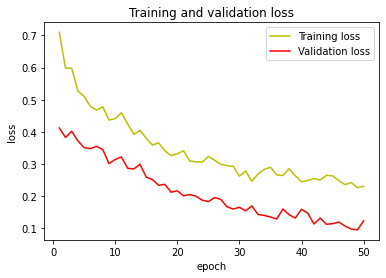

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'y',label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

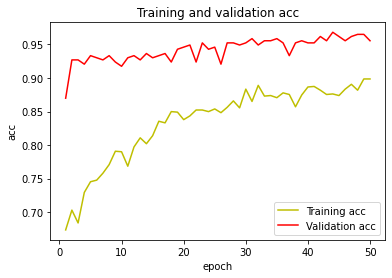

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(loss)+1)
plt.plot(epochs,acc,'y',label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

In [12]:
uploaded = files.upload()

# Dictionary untuk mapping indeks kelas dengan nama kelas
class_mapping = {
    0: 'Manggis',
    1: 'Pisang',
    2: 'Rambutan'
}

for fn in uploaded.keys():

  # Memuat gambar dan mengubahnya menjadi array
  img = load_img(fn, target_size=(300 , 300))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  # Memprediksi kelas gambar
  predictions = model.predict(x)

  # Mendapatkan kelas dengan probabilitas tertinggi
  predicted_class_index = np.argmax(predictions)

  # Mendapatkan nama kelas berdasarkan indeks
  predicted_class = class_mapping[predicted_class_index]

  print(f"File: {fn}")
  print(f"Result: {predictions}")
  print(f"Predicted Class: {predicted_class}")


NameError: name 'files' is not defined

In [ ]:
asdasd

In [ ]:
model = load_model('/content/Content/MyDrive/Tugas Akhir/Dataset 522 Resize/Model Test/Model_test 1 522 data 50 Epochs.h5')